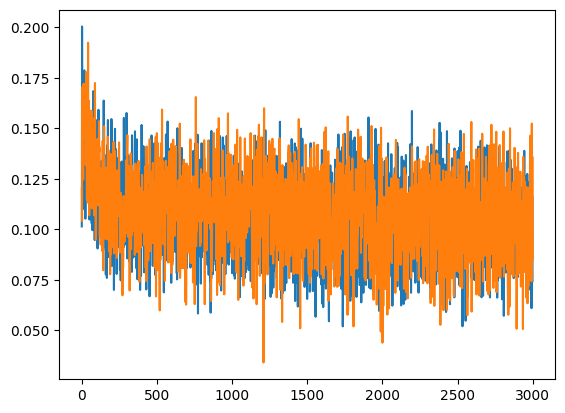

In [19]:
import numpy as np
import matplotlib.pyplot as plt
data1 = np.genfromtxt('Tribometer_data\DATA\OA-10_10N_100mms_test4_May8_reported_CoF.csv', delimiter=',', skip_header=1)
data2 = np.genfromtxt('datos2.txt', delimiter=',')
plt.plot(data1)
plt.plot(np.linspace(0,len(data1),len(data2)),data2)


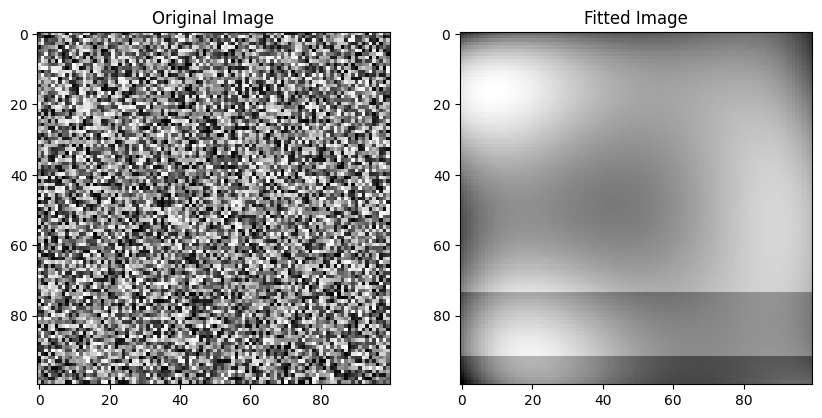

In [6]:
import numpy as np
from scipy.optimize import least_squares
import matplotlib.pyplot as plt


def fit_image_to_polynomial(image, degree):
    # Step 1 & 2: Flatten the 2D array and generate meshgrid for coordinates
    y, x = np.indices(image.shape)
    x = x.flatten()
    y = y.flatten()
    z = image.flatten()  # Flatten the image array

    # Polynomial model function
    def poly_model(coeffs, x, y, degree, z=None):
        idx = 0
        model = np.zeros_like(x, dtype=np.float64)
        for i in range(degree + 1):
            for j in range(degree + 1 - i):
                model += coeffs[idx] * (x ** i) * (y ** j)
                idx += 1
        return model - z if z is not None else model

    # Number of coefficients for a given degree
    def num_coeffs(degree):
        return (degree + 1) * (degree + 2) // 2

    # Step 4: Fit polynomial
    initial_guess = np.zeros(num_coeffs(degree))
    res = least_squares(poly_model, initial_guess, args=(x, y, degree, z))

    # Step 5: Evaluate polynomial
    fitted_image = poly_model(res.x, x, y, degree).reshape(image.shape)

    return fitted_image

# Example usage
image = np.random.rand(100, 100)  # Example 2D numpy array
degree = 5  # Degree of the polynomial
fitted_image = fit_image_to_polynomial(image, degree)

# Plot original and fitted image
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(fitted_image, cmap='gray')
ax[1].set_title('Fitted Image')
plt.show()